# Notebook 1: This notebook is where I initialize my users dataset and explore the data


# Goal: identify users who are the trendsetters on Yelp

### Steps:
1.	Business: determine the top businesses that have good ratings and bad ratings (in .5 increments).
2.	Link these businesses to their reviews, which has user IDs
3.	Identify the people who reviews these businesses
4. Run supervised learning (Random Forest?) to get the characteristics of each group of reviewers
4.	Based on the review dates, keep track of the review averages
5.	Once it hits a tipping point, say 4 stars, identify the reviewers up until that point
6.	Technically, those are the trendsetters.
7. Mine data on the qualities/features of this identified trendsetters
8. Use the features to predict future trendsetters

In [5]:
import pandas as pd

In [7]:
with open('yelp_academic_dataset_user.json', 'rb') as f:
    data = f.readlines()
    data = map(lambda x: x.rstrip(), data)
    data_json_str = "[" + ','.join(data) + "]"
    data_user = pd.read_json(data_json_str)

In [8]:
data_user.head()

,average_stars,compliments,elite,fans,friends,name,review_count,type,user_id,votes,yelping_since
0,4.14,"{u'profile': 8, u'cute': 15, u'funny': 11, u'p...","[2005, 2006]",69,"[rpOyqD_893cqmDAtJLbdog, 4U9kSBLuBDU391x6bxU-Y...",Russel,108,user,18kPq7GPye-YQ3LyKyAZPw,"{u'funny': 166, u'useful': 278, u'cool': 245}",2004-10
1,3.64,"{u'profile': 110, u'cute': 209, u'funny': 561,...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",1012,"[18kPq7GPye-YQ3LyKyAZPw, 4U9kSBLuBDU391x6bxU-Y...",Jeremy,1233,user,rpOyqD_893cqmDAtJLbdog,"{u'funny': 6849, u'useful': 12642, u'cool': 9837}",2004-10
2,3.59,"{u'profile': 9, u'cute': 23, u'funny': 122, u'...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",93,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Michael,442,user,4U9kSBLuBDU391x6bxU-YA,"{u'funny': 907, u'useful': 1445, u'cool': 727}",2004-10
3,4.64,{u'cute': 2},[],2,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Ken,11,user,fHtTaujcyKvXglE33Z5yIw,"{u'funny': 1, u'useful': 11, u'cool': 5}",2004-10
4,3.80,"{u'cute': 2, u'plain': 2, u'writer': 2, u'note...",[2005],3,"[rpOyqD_893cqmDAtJLbdog, HDQixQ-WZEV0LVPJlIGQe...",Katherine,66,user,SIBCL7HBkrP4llolm4SC2A,"{u'funny': 10, u'useful': 34, u'cool': 11}",2004-10


In [9]:
# Get a set of all compliment types from the data
compliments = set()
for compliment_dict in data_user.compliments:
    compliments.update(compliment_dict.keys())
print compliments

set([u'profile', u'cute', u'funny', u'plain', u'writer', u'list', u'note', u'photos', u'hot', u'cool', u'more'])


In [10]:
data_user_copy = data_user.copy()
for compliment in compliments:
    column = []
    for compliment_dict in data_user_copy.compliments:
        column.append(compliment_dict.get(compliment, 0))
    data_user_copy['compliment_' + compliment] = pd.Series(column)

data_user_copy.head()

,average_stars,compliments,elite,fans,friends,name,review_count,type,user_id,votes,...,compliment_cute,compliment_funny,compliment_plain,compliment_writer,compliment_list,compliment_note,compliment_photos,compliment_hot,compliment_cool,compliment_more
0,4.14,"{u'profile': 8, u'cute': 15, u'funny': 11, u'p...","[2005, 2006]",69,"[rpOyqD_893cqmDAtJLbdog, 4U9kSBLuBDU391x6bxU-Y...",Russel,108,user,18kPq7GPye-YQ3LyKyAZPw,"{u'funny': 166, u'useful': 278, u'cool': 245}",...,15,11,25,9,0,20,15,48,78,3
1,3.64,"{u'profile': 110, u'cute': 209, u'funny': 561,...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",1012,"[18kPq7GPye-YQ3LyKyAZPw, 4U9kSBLuBDU391x6bxU-Y...",Jeremy,1233,user,rpOyqD_893cqmDAtJLbdog,"{u'funny': 6849, u'useful': 12642, u'cool': 9837}",...,209,561,921,290,37,589,287,1032,1521,129
2,3.59,"{u'profile': 9, u'cute': 23, u'funny': 122, u'...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",93,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Michael,442,user,4U9kSBLuBDU391x6bxU-YA,"{u'funny': 907, u'useful': 1445, u'cool': 727}",...,23,122,86,24,4,82,23,102,145,19
3,4.64,{u'cute': 2},[],2,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Ken,11,user,fHtTaujcyKvXglE33Z5yIw,"{u'funny': 1, u'useful': 11, u'cool': 5}",...,2,0,0,0,0,0,0,0,0,0
4,3.80,"{u'cute': 2, u'plain': 2, u'writer': 2, u'note...",[2005],3,"[rpOyqD_893cqmDAtJLbdog, HDQixQ-WZEV0LVPJlIGQe...",Katherine,66,user,SIBCL7HBkrP4llolm4SC2A,"{u'funny': 10, u'useful': 34, u'cool': 11}",...,2,0,2,2,0,1,0,1,1,1


In [11]:
column = []
for friends_list in data_user_copy.friends:
    num_friends = len(friends_list)
    column.append(num_friends)
data_user_copy['number_of_friends'] = pd.Series(column)

data_user_copy.head()

,average_stars,compliments,elite,fans,friends,name,review_count,type,user_id,votes,...,compliment_funny,compliment_plain,compliment_writer,compliment_list,compliment_note,compliment_photos,compliment_hot,compliment_cool,compliment_more,number_of_friends
0,4.14,"{u'profile': 8, u'cute': 15, u'funny': 11, u'p...","[2005, 2006]",69,"[rpOyqD_893cqmDAtJLbdog, 4U9kSBLuBDU391x6bxU-Y...",Russel,108,user,18kPq7GPye-YQ3LyKyAZPw,"{u'funny': 166, u'useful': 278, u'cool': 245}",...,11,25,9,0,20,15,48,78,3,206
1,3.64,"{u'profile': 110, u'cute': 209, u'funny': 561,...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",1012,"[18kPq7GPye-YQ3LyKyAZPw, 4U9kSBLuBDU391x6bxU-Y...",Jeremy,1233,user,rpOyqD_893cqmDAtJLbdog,"{u'funny': 6849, u'useful': 12642, u'cool': 9837}",...,561,921,290,37,589,287,1032,1521,129,1904
2,3.59,"{u'profile': 9, u'cute': 23, u'funny': 122, u'...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",93,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Michael,442,user,4U9kSBLuBDU391x6bxU-YA,"{u'funny': 907, u'useful': 1445, u'cool': 727}",...,122,86,24,4,82,23,102,145,19,354
3,4.64,{u'cute': 2},[],2,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Ken,11,user,fHtTaujcyKvXglE33Z5yIw,"{u'funny': 1, u'useful': 11, u'cool': 5}",...,0,0,0,0,0,0,0,0,0,4
4,3.80,"{u'cute': 2, u'plain': 2, u'writer': 2, u'note...",[2005],3,"[rpOyqD_893cqmDAtJLbdog, HDQixQ-WZEV0LVPJlIGQe...",Katherine,66,user,SIBCL7HBkrP4llolm4SC2A,"{u'funny': 10, u'useful': 34, u'cool': 11}",...,0,2,2,0,1,0,1,1,1,4


In [12]:
column = []
for elite_list in data_user_copy.elite:
    num_elite = len(elite_list)
    column.append(num_elite)
data_user_copy['number_of_elite_years'] = pd.Series(column)

data_user_copy.head()

,average_stars,compliments,elite,fans,friends,name,review_count,type,user_id,votes,...,compliment_plain,compliment_writer,compliment_list,compliment_note,compliment_photos,compliment_hot,compliment_cool,compliment_more,number_of_friends,number_of_elite_years
0,4.14,"{u'profile': 8, u'cute': 15, u'funny': 11, u'p...","[2005, 2006]",69,"[rpOyqD_893cqmDAtJLbdog, 4U9kSBLuBDU391x6bxU-Y...",Russel,108,user,18kPq7GPye-YQ3LyKyAZPw,"{u'funny': 166, u'useful': 278, u'cool': 245}",...,25,9,0,20,15,48,78,3,206,2
1,3.64,"{u'profile': 110, u'cute': 209, u'funny': 561,...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",1012,"[18kPq7GPye-YQ3LyKyAZPw, 4U9kSBLuBDU391x6bxU-Y...",Jeremy,1233,user,rpOyqD_893cqmDAtJLbdog,"{u'funny': 6849, u'useful': 12642, u'cool': 9837}",...,921,290,37,589,287,1032,1521,129,1904,11
2,3.59,"{u'profile': 9, u'cute': 23, u'funny': 122, u'...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",93,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Michael,442,user,4U9kSBLuBDU391x6bxU-YA,"{u'funny': 907, u'useful': 1445, u'cool': 727}",...,86,24,4,82,23,102,145,19,354,11
3,4.64,{u'cute': 2},[],2,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Ken,11,user,fHtTaujcyKvXglE33Z5yIw,"{u'funny': 1, u'useful': 11, u'cool': 5}",...,0,0,0,0,0,0,0,0,4,0
4,3.80,"{u'cute': 2, u'plain': 2, u'writer': 2, u'note...",[2005],3,"[rpOyqD_893cqmDAtJLbdog, HDQixQ-WZEV0LVPJlIGQe...",Katherine,66,user,SIBCL7HBkrP4llolm4SC2A,"{u'funny': 10, u'useful': 34, u'cool': 11}",...,2,2,0,1,0,1,1,1,4,1


In [13]:
# Get a set of all votes types from the data
votes = set()
for vote_dict in data_user.votes:
    votes.update(vote_dict.keys())
print votes

set([u'funny', u'useful', u'cool'])


In [14]:
for vote in votes:
    column = []
    for vote_dict in data_user_copy.votes:
        column.append(vote_dict.get(vote, 0))
    data_user_copy['vote_' + vote] = pd.Series(column)

data_user_copy.head()

,average_stars,compliments,elite,fans,friends,name,review_count,type,user_id,votes,...,compliment_note,compliment_photos,compliment_hot,compliment_cool,compliment_more,number_of_friends,number_of_elite_years,vote_funny,vote_useful,vote_cool
0,4.14,"{u'profile': 8, u'cute': 15, u'funny': 11, u'p...","[2005, 2006]",69,"[rpOyqD_893cqmDAtJLbdog, 4U9kSBLuBDU391x6bxU-Y...",Russel,108,user,18kPq7GPye-YQ3LyKyAZPw,"{u'funny': 166, u'useful': 278, u'cool': 245}",...,20,15,48,78,3,206,2,166,278,245
1,3.64,"{u'profile': 110, u'cute': 209, u'funny': 561,...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",1012,"[18kPq7GPye-YQ3LyKyAZPw, 4U9kSBLuBDU391x6bxU-Y...",Jeremy,1233,user,rpOyqD_893cqmDAtJLbdog,"{u'funny': 6849, u'useful': 12642, u'cool': 9837}",...,589,287,1032,1521,129,1904,11,6849,12642,9837
2,3.59,"{u'profile': 9, u'cute': 23, u'funny': 122, u'...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",93,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Michael,442,user,4U9kSBLuBDU391x6bxU-YA,"{u'funny': 907, u'useful': 1445, u'cool': 727}",...,82,23,102,145,19,354,11,907,1445,727
3,4.64,{u'cute': 2},[],2,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Ken,11,user,fHtTaujcyKvXglE33Z5yIw,"{u'funny': 1, u'useful': 11, u'cool': 5}",...,0,0,0,0,0,4,0,1,11,5
4,3.80,"{u'cute': 2, u'plain': 2, u'writer': 2, u'note...",[2005],3,"[rpOyqD_893cqmDAtJLbdog, HDQixQ-WZEV0LVPJlIGQe...",Katherine,66,user,SIBCL7HBkrP4llolm4SC2A,"{u'funny': 10, u'useful': 34, u'cool': 11}",...,1,0,1,1,1,4,1,10,34,11


In [15]:
data_user_copy['total_compliment'] = data_user_copy.compliment_profile + data_user_copy.compliment_cute + data_user_copy.compliment_funny + data_user_copy.compliment_plain + data_user_copy.compliment_writer + data_user_copy.compliment_list + data_user_copy.compliment_note + data_user_copy.compliment_photos + data_user_copy.compliment_cool + data_user_copy.compliment_hot + data_user_copy.compliment_more

In [17]:
data_user_copy['yelping_since'] = pd.to_datetime(data_user_copy['yelping_since'])

#data_user_copy['yelping_since'].astype('datetime64[ns]')
#df['A'] = pd.to_datetime(df['A'])


In [19]:
data_user_copy.yelping_since.head()

0   2004-10-01
1   2004-10-01
2   2004-10-01
3   2004-10-01
4   2004-10-01
Name: yelping_since, dtype: datetime64[ns]

In [20]:
data_user_copy['today'] = '2015-10-01'
data_user_copy['today'] = pd.to_datetime(data_user_copy['today'])

data_user_copy['yelping_age'] = data_user_copy['today'] - data_user_copy['yelping_since']

In [22]:
data_user_copy.head()

,average_stars,compliments,elite,fans,friends,name,review_count,type,user_id,votes,...,compliment_cool,compliment_more,number_of_friends,number_of_elite_years,vote_funny,vote_useful,vote_cool,total_compliment,today,yelping_age
0,4.14,"{u'profile': 8, u'cute': 15, u'funny': 11, u'p...","[2005, 2006]",69,"[rpOyqD_893cqmDAtJLbdog, 4U9kSBLuBDU391x6bxU-Y...",Russel,108,user,18kPq7GPye-YQ3LyKyAZPw,"{u'funny': 166, u'useful': 278, u'cool': 245}",...,78,3,206,2,166,278,245,232,2015-10-01,4017 days
1,3.64,"{u'profile': 110, u'cute': 209, u'funny': 561,...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",1012,"[18kPq7GPye-YQ3LyKyAZPw, 4U9kSBLuBDU391x6bxU-Y...",Jeremy,1233,user,rpOyqD_893cqmDAtJLbdog,"{u'funny': 6849, u'useful': 12642, u'cool': 9837}",...,1521,129,1904,11,6849,12642,9837,5686,2015-10-01,4017 days
2,3.59,"{u'profile': 9, u'cute': 23, u'funny': 122, u'...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",93,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Michael,442,user,4U9kSBLuBDU391x6bxU-YA,"{u'funny': 907, u'useful': 1445, u'cool': 727}",...,145,19,354,11,907,1445,727,639,2015-10-01,4017 days
3,4.64,{u'cute': 2},[],2,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Ken,11,user,fHtTaujcyKvXglE33Z5yIw,"{u'funny': 1, u'useful': 11, u'cool': 5}",...,0,0,4,0,1,11,5,2,2015-10-01,4017 days
4,3.80,"{u'cute': 2, u'plain': 2, u'writer': 2, u'note...",[2005],3,"[rpOyqD_893cqmDAtJLbdog, HDQixQ-WZEV0LVPJlIGQe...",Katherine,66,user,SIBCL7HBkrP4llolm4SC2A,"{u'funny': 10, u'useful': 34, u'cool': 11}",...,1,1,4,1,10,34,11,10,2015-10-01,4017 days


In [71]:
data_user_copy['yelping_age'] = (data_user_copy['yelping_age'] / np.timedelta64(1, 'D')).astype(int)

In [72]:
data_user_copy.describe()

,average_stars,fans,review_count,compliment_profile,compliment_cute,compliment_funny,compliment_plain,compliment_writer,compliment_list,compliment_note,...,compliment_cool,compliment_more,number_of_friends,number_of_elite_years,vote_funny,vote_useful,vote_cool,total_compliment,yelping_age,yelping age
count,366715.000000,366715.000000,366715.000000,366715.000000,366715.000000,366715.000000,366715.000000,366715.000000,366715.000000,366715.000000,...,366715.000000,366715.000000,366715.000000,366715.000000,366715.000000,366715.000000,366715.000000,366715.000000,366715.000000,3.667150e+05
mean,3.718782,1.575338,32.214810,0.398094,0.468162,2.712090,5.959214,2.132604,0.216841,2.553582,...,5.800259,0.602258,7.025017,0.224340,29.857050,58.979655,33.380991,26.335473,1465.349473,1.266062e+17
std,1.029877,11.589510,94.837065,20.571266,19.249601,48.067689,105.258667,34.038725,13.906592,36.621823,...,89.276761,15.077802,39.901852,0.948327,302.811392,405.049365,335.355325,484.829538,714.087542,6.169716e+16
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,273.000000,2.358720e+16
25%,3.270000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,883.000000,7.629120e+16
50%,3.860000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,1.000000,0.000000,1400.000000,1.209600e+17
75%,4.430000,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,6.000000,22.000000,6.000000,2.000000,1918.000000,1.657152e+17
max,5.000000,1298.000000,8843.000000,9955.000000,10473.000000,10254.000000,19019.000000,10167.000000,7805.000000,10033.000000,...,20407.000000,7373.000000,3830.000000,11.000000,32747.000000,36474.000000,32517.000000,175944.000000,4017.000000,3.470688e+17


In [73]:
data_user_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366715 entries, 0 to 366714
Data columns (total 26 columns):
average_stars            366715 non-null float64
elite                    366715 non-null object
fans                     366715 non-null int64
name                     366715 non-null object
review_count             366715 non-null int64
type                     366715 non-null object
user_id                  366715 non-null object
compliment_profile       366715 non-null int64
compliment_cute          366715 non-null int64
compliment_funny         366715 non-null int64
compliment_plain         366715 non-null int64
compliment_writer        366715 non-null int64
compliment_list          366715 non-null int64
compliment_note          366715 non-null int64
compliment_photos        366715 non-null int64
compliment_hot           366715 non-null int64
compliment_cool          366715 non-null int64
compliment_more          366715 non-null int64
number_of_friends        366715 non-n

In [74]:
# data_user_copy.drop(['compliments', 'friends', 'votes'])
data_user_copy.drop(data_user_copy.columns[[-1]], axis=1, inplace=True)

In [75]:
data_user_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366715 entries, 0 to 366714
Data columns (total 25 columns):
average_stars            366715 non-null float64
elite                    366715 non-null object
fans                     366715 non-null int64
name                     366715 non-null object
review_count             366715 non-null int64
type                     366715 non-null object
user_id                  366715 non-null object
compliment_profile       366715 non-null int64
compliment_cute          366715 non-null int64
compliment_funny         366715 non-null int64
compliment_plain         366715 non-null int64
compliment_writer        366715 non-null int64
compliment_list          366715 non-null int64
compliment_note          366715 non-null int64
compliment_photos        366715 non-null int64
compliment_hot           366715 non-null int64
compliment_cool          366715 non-null int64
compliment_more          366715 non-null int64
number_of_friends        366715 non-n

In [77]:
data_user_copy.to_csv('yelp_users.csv', encoding='utf-8')

In [69]:
user_data = pd.read_csv('yelp_users.csv')
user_data.head()

,Unnamed: 0,average_stars,elite,fans,name,review_count,type,user_id,compliment_profile,compliment_cute,...,compliment_hot,compliment_cool,compliment_more,number_of_friends,number_of_elite_years,vote_funny,vote_useful,vote_cool,total_compliment,yelping_age
0,0,4.14,"[2005, 2006]",69,Russel,108,user,18kPq7GPye-YQ3LyKyAZPw,8,15,...,48,78,3,206,2,166,278,245,232,4017 days 00:00:00.000000000
1,1,3.64,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",1012,Jeremy,1233,user,rpOyqD_893cqmDAtJLbdog,110,209,...,1032,1521,129,1904,11,6849,12642,9837,5686,4017 days 00:00:00.000000000
2,2,3.59,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",93,Michael,442,user,4U9kSBLuBDU391x6bxU-YA,9,23,...,102,145,19,354,11,907,1445,727,639,4017 days 00:00:00.000000000
3,3,4.64,[],2,Ken,11,user,fHtTaujcyKvXglE33Z5yIw,0,2,...,0,0,0,4,0,1,11,5,2,4017 days 00:00:00.000000000
4,4,3.80,[2005],3,Katherine,66,user,SIBCL7HBkrP4llolm4SC2A,0,2,...,1,1,1,4,1,10,34,11,10,4017 days 00:00:00.000000000


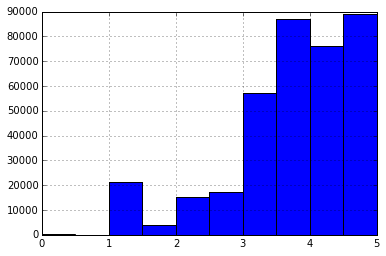

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
data_user_copy.average_stars.hist()

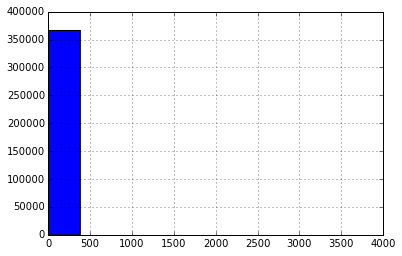

In [29]:
data_user_copy.number_of_friends.hist()

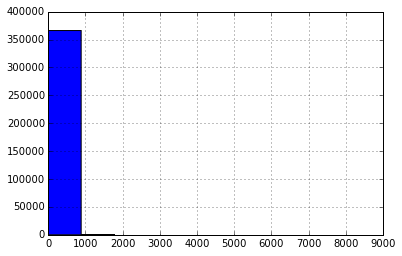

In [30]:
data_user_copy.review_count.hist()

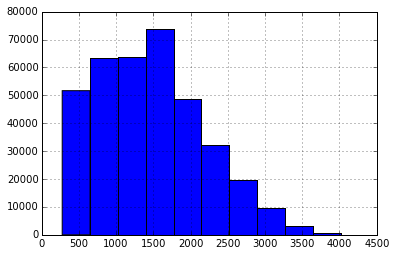

In [78]:
data_user_copy.yelping_age.hist()

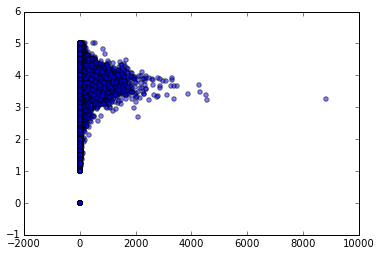

In [36]:
import numpy as np

review_count_list = data_user_copy['review_count'].tolist()
average_stars_list = data_user_copy['average_stars'].tolist()
x = review_count_list
y = average_stars_list
# colors = np.random.rand(N)
# area = np.pi * (15 * np.random.rand(N))**2 # 0 to 15 point radiuses

plt.scatter(x, y, alpha=0.5)
plt.show()
plt.figure(figsize=(20,10))

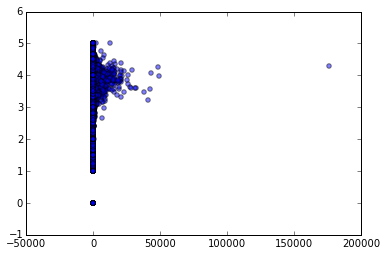

In [37]:
N = 50

total_compliment_list = data_user_copy['total_compliment'].tolist()
average_stars_list = data_user_copy['average_stars'].tolist()
x = total_compliment_list
y = average_stars_list
# colors = np.random.rand(N)
# area = np.pi * (15 * np.random.rand(N))**2 # 0 to 15 point radiuses

plt.scatter(x, y, alpha=0.5)
plt.show()
plt.figure(figsize=(20,10))

In [38]:
with open('yelp_academic_dataset_business.json', 'rb') as f:
    data = f.readlines()
    data = map(lambda x: x.rstrip(), data)
    data_json_str = "[" + ','.join(data) + "]"
    data_business = pd.read_json(data_json_str)
    
data_business.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,{u'By Appointment Only': True},vcNAWiLM4dR7D2nwwJ7nCA,"[Doctors, Health & Medical]",Phoenix,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{u'Thursday': {u'close': u'17:00', u'open': u'...",33.499313,-111.983758,"Eric Goldberg, MD",[],True,9,3.5,AZ,business
1,"{u'Happy Hour': True, u'Accepts Credit Cards':...",UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350519,-79.886930,Clancy's Pub,[],True,4,3.5,PA,business
2,{u'Good for Kids': True},cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.356896,-80.015910,Cool Springs Golf Center,[],False,5,2.5,PA,business
3,{},HZdLhv6COCleJMo7nPl-RA,"[Shopping, Home Services, Internet Service Pro...",Pittsburgh,"301 S Hills Vlg\nPittsburgh, PA 15241","{u'Monday': {u'close': u'21:00', u'open': u'10...",40.357620,-80.059980,Verizon Wireless,[],True,3,3.5,PA,business
4,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",Braddock,"414 Hawkins Ave\nBraddock, PA 15104","{u'Tuesday': {u'close': u'19:00', u'open': u'1...",40.408735,-79.866351,Emil's Lounge,[],True,11,4.5,PA,business


In [39]:
data_business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61184 entries, 0 to 61183
Data columns (total 15 columns):
attributes       61184 non-null object
business_id      61184 non-null object
categories       61184 non-null object
city             61184 non-null object
full_address     61184 non-null object
hours            61184 non-null object
latitude         61184 non-null float64
longitude        61184 non-null float64
name             61184 non-null object
neighborhoods    61184 non-null object
open             61184 non-null bool
review_count     61184 non-null int64
stars            61184 non-null float64
state            61184 non-null object
type             61184 non-null object
dtypes: bool(1), float64(3), int64(1), object(10)
memory usage: 7.1+ MB


In [57]:
data_business.describe()

,latitude,longitude,open,review_count,stars
count,61184.000000,61184.000000,61184,61184.000000,61184.000000
mean,37.326077,-97.491803,0.878089,28.272506,3.673305
std,5.741085,29.624473,0.3271856,88.652050,0.891207
min,32.871923,-115.386550,False,3.000000,1.000000
25%,33.509601,-115.052224,1,4.000000,3.000000
50%,35.994636,-111.932944,1,8.000000,3.500000
75%,36.240430,-80.863329,1,21.000000,4.500000
max,56.036545,8.549249,True,4578.000000,5.000000


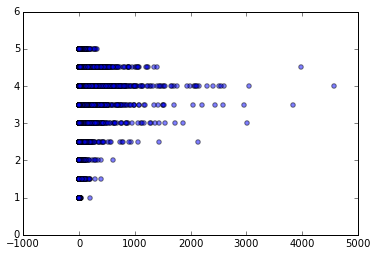

In [59]:
review_count_list = data_business['review_count'].tolist()
stars_list = data_business['stars'].tolist()
x = review_count_list
y = stars_list
# colors = np.random.rand(N)
# area = np.pi * (15 * np.random.rand(N))**2 # 0 to 15 point radiuses

plt.scatter(x, y, alpha=0.5)
plt.show()
plt.figure(figsize=(20,10))

In [64]:
closed = data_business[data_business.open == False]


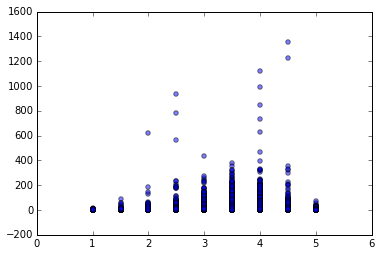

In [67]:
review_count_list = closed['review_count'].tolist()
stars_list = closed['stars'].tolist()
y = review_count_list
x = stars_list
# colors = np.random.rand(N)
# area = np.pi * (15 * np.random.rand(N))**2 # 0 to 15 point radiuses

plt.scatter(x, y, alpha=0.5)
plt.show()
plt.figure(figsize=(20,10))

In [66]:
closed.describe()

,latitude,longitude,open,review_count,stars
count,7459.000000,7459.000000,7459,7459.000000,7459.000000
mean,36.810197,-100.235469,0,21.391742,3.542030
std,5.353798,26.349892,0,48.835758,0.802464
min,32.876848,-115.351900,False,3.000000,1.000000
25%,33.499505,-115.081431,0,4.000000,3.000000
50%,35.224588,-111.940346,0,9.000000,3.500000
75%,36.165237,-89.376339,0,20.000000,4.000000
max,55.990547,8.476450,False,1352.000000,5.000000
